In [58]:
import pandas as pd

In [59]:
from google.colab import files
uploaded = files.upload()

Saving Equity_Report_Data__Geography_20241016.csv to Equity_Report_Data__Geography_20241016 (1).csv


In [61]:
mh_data = pd.read_csv('Equity_Report_Data__Geography_20241016.csv')
mh_data.columns

Index(['Area', 'Category', 'Data Source', 'Data Year', 'Equity Report Year',
       'Geography Type', 'Indicator', 'Notes', 'Percent', 'Percentile',
       'Unit for Value', 'Value', 'multipolygon'],
      dtype='object')

In [62]:
##Getting Census Data###

import requests
import csv

# Census API URL
url = "https://api.census.gov/data/2020/dec/pl?get=P1_001N,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,P1_009N&for=tract:*&in=county:073&in=state:06&key=da18c74f7a790b47b152d79293d1c805dd99e042"

# Make the API request
response = requests.get(url)
data = response.json()

# Change column names (first row contains the default column names from the API)
column_names = ["Total Population", "White Alone", "Black or African American Alone",
                "American Indian and Alaska Native Alone", "Asian Alone",
                "Native Hawaiian and Other Pacific Islander Alone", "Some Other Race Alone",
                "Two or More Races", "State", "County", "Tract"]

# Replace the first row with the new column names
data[0] = column_names

# Write to CSV
with open('san_diego_census_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print("san_diego_census_data.csv")

census_data = pd.read_csv('san_diego_census_data.csv')
census_data.head()

san_diego_census_data.csv


,Total Population,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,State,County,Tract
0,7844,2302,106,20,4516,5,150,745,6,73,17064
1,9344,4579,151,17,3273,12,295,1017,6,73,17065
2,5989,3540,105,18,1455,6,166,699,6,73,17066
3,3213,1622,54,7,1101,7,80,342,6,73,17067
4,4778,2115,124,10,1837,16,135,541,6,73,17068


In [63]:
census_data_new = census_data.drop(columns=['State','County'])


In [64]:
census_data_new = census_data.drop(columns=['State','County'])
merged_df = pd.merge(mh_data, census_data_new, left_on = 'Area', right_on='Tract', how = 'inner')
merged_df

,Area,Category,Data Source,Data Year,Equity Report Year,Geography Type,Indicator,Notes,Percent,Percentile,...,multipolygon,Total Population,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Tract
0,15701,Low Income Population HPSA,"Health Resources & Services Administration, 2021.",2021,2023,Census Tract,Mental Health Health Professional Shortage Areas,HPSA designations are based on 2010 Census Tra...,NaN,NaN,...,"MULTIPOLYGON (((-116.948202 32.794918, -116.95...",6503,2985,701,77,394,35,1426,885,15701
1,16504,Low Income Population HPSA,"Health Resources & Services Administration, 2021.",2021,2023,Census Tract,Mental Health Health Professional Shortage Areas,HPSA designations are based on 2010 Census Tra...,NaN,NaN,...,"MULTIPOLYGON (((-116.961937 32.807681, -116.96...",7171,3039,782,100,305,56,1696,1193,16504
2,13000,Low Income Population HPSA,"Health Resources & Services Administration, 2021.",2021,2023,Census Tract,Mental Health Health Professional Shortage Areas,HPSA designations are based on 2010 Census Tra...,NaN,NaN,...,"MULTIPOLYGON (((-117.088104 32.627514, -117.08...",5997,1619,296,145,312,58,2072,1495,13000
3,16503,Low Income Population HPSA,"Health Resources & Services Administration, 2021.",2021,2023,Census Tract,Mental Health Health Professional Shortage Areas,HPSA designations are based on 2010 Census Tra...,NaN,NaN,...,"MULTIPOLYGON (((-116.960686 32.821619, -116.96...",3056,1887,181,44,87,22,336,499,16503
4,16502,Low Income Population HPSA,"Health Resources & Services Administration, 2021.",2021,2023,Census Tract,Mental Health Health Professional Shortage Areas,HPSA designations are based on 2010 Census Tra...,NaN,NaN,...,"MULTIPOLYGON (((-116.939589 32.821231, -116.93...",7271,4283,440,87,265,46,1029,1121,16502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,21600,Low Income Population HPSA,"Health Resources & Services Administration, 2021.",2021,2023,Census Tract,Mental Health Health Professional Shortage Areas,HPSA designations are based on 2010 Census Tra...,NaN,NaN,...,MULTIPOLYGON (((-117.16651029535 32.6689946105...,3584,2507,213,40,105,5,251,463,21600
137,2707,Low Income Population HPSA,"Health Resources & Services Administration, 2021.",2021,2023,Census Tract,Mental Health Health Professional Shortage Areas,HPSA designations are based on 2010 Census Tra...,NaN,NaN,...,"MULTIPOLYGON (((-117.091984 32.749537, -117.09...",4687,591,774,84,1001,16,1617,604,2707
138,2601,Low Income Population HPSA,"Health Resources & Services Administration, 2021.",2021,2023,Census Tract,Mental Health Health Professional Shortage Areas,HPSA designations are based on 2010 Census Tra...,NaN,NaN,...,"MULTIPOLYGON (((-117.092289 32.748449, -117.09...",5326,961,245,95,1156,11,2071,787,2601
139,2402,Low Income Population HPSA,"Health Resources & Services Administration, 2021.",2021,2023,Census Tract,Mental Health Health Professional Shortage Areas,HPSA designations are based on 2010 Census Tra...,NaN,NaN,...,"MULTIPOLYGON (((-117.103232 32.749633, -117.10...",4735,672,562,170,661,6,1878,786,2402


In [65]:
total_pop_shortage = sum(merged_df['Total Population'])
print(total_pop_shortage)

626088


In [66]:
total_pop_sd = sum(census_data_new['Total Population'])
print(total_pop_sd)

3298634


In [67]:
underserved_rate = total_pop_shortage/total_pop_sd
print(underserved_rate)

0.18980220297250316


In [123]:
total_demos = {'White': sum(census_data_new['White Alone']),
              'Black': sum(census_data_new['Black or African American Alone']),
               'Other': sum(census_data_new['Some Other Race Alone']),
               'Pacific Islander': sum(census_data_new['Native Hawaiian and Other Pacific Islander Alone']),
               'Multiracial':sum(census_data_new['Two or More Races']),
               'Indigenous': sum(census_data_new['Native Hawaiian and Other Pacific Islander Alone']),
               'Asian': sum(census_data_new['Asian Alone']),
              }
print(total_demos)
total_s = sum(total_demos.values())
total_demo_rates = {}
for race, total in total_demos.items():
  total_demo_rates[race] = total/total_s

print(total_demo_rates)

{'White': 1633129, 'Black': 155813, 'Other': 520994, 'Pacific Islander': 15286, 'Multiracial': 521692, 'Indigenous': 15286, 'Asian': 410752}
{'White': 0.4989773757757523, 'Black': 0.0476062588146725, 'Other': 0.15918168063570745, 'Pacific Islander': 0.004670401521317758, 'Multiracial': 0.15939494376941674, 'Indigenous': 0.004670401521317758, 'Asian': 0.12549893796181552}


In [120]:
mh_demos = {'White': sum(merged_df['White Alone']),
            'Black': sum(merged_df['Black or African American Alone']),
            'Other': sum(merged_df['Some Other Race Alone']),
            'Pacific Islander': sum(merged_df['Native Hawaiian and Other Pacific Islander Alone']),
            'Multiracial':sum(merged_df['Two or More Races']),
            'Indigenous': sum(merged_df['Native Hawaiian and Other Pacific Islander Alone']),
            'Asian': sum(merged_df['Asian Alone']),
              }
mh_total_s=sum(mh_demos.values())
print(mh_demos)
mh_demo_rates = {}
for race, total in mh_demos.items():
  mh_demo_rates[race] = total/mh_total_s

print(mh_demo_rates)


{'White': 201327, 'Black': 51058, 'Other': 182732, 'Pacific Islander': 3056, 'Multiracial': 119110, 'Indigenous': 3056, 'Asian': 59065}
{'White': 0.32503341922234924, 'Black': 0.08243085288438563, 'Other': 0.29501262503955417, 'Pacific Islander': 0.00493377504827221, 'Multiracial': 0.19229775719885567, 'Indigenous': 0.00493377504827221, 'Asian': 0.09535779555831089}


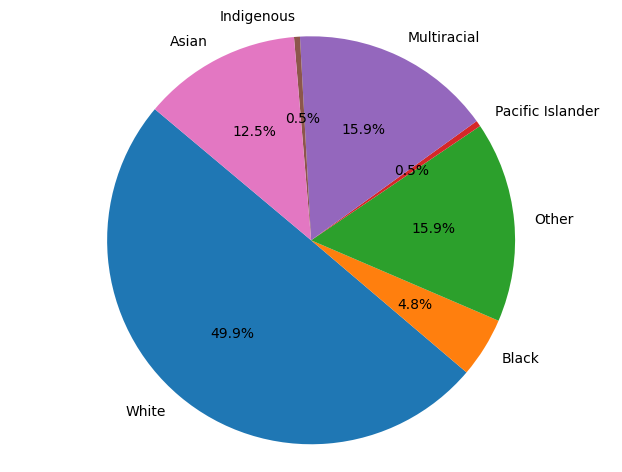

In [124]:
import matplotlib.pyplot as plt

labels = total_demos.keys()
sizes = total_demos.values()


plt.pie(sizes,  labels=labels,labeldistance = 1.1,
        autopct='%1.1f%%',  startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.tight_layout()
plt.show()

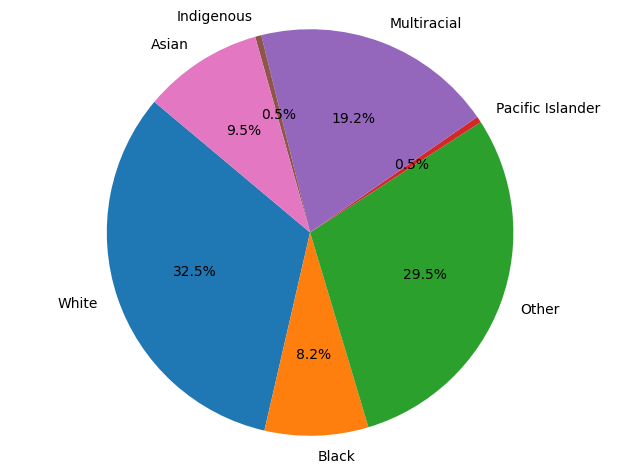

In [122]:
labels = mh_demos.keys()
sizes = mh_demos.values()

plt.pie(sizes, labels=labels,
        autopct='%1.1f%%',  startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.tight_layout()

plt.show()